In [2]:
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')

# 4. 探索的データ分析

## 4.1 データの理解

In [3]:
# タイタニックのデータセットを読み込む
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/raw/titanic.csv'
titanic = pd.read_csv(url)
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 4.2.1 データの意味の確認

In [4]:
# 最初の5行を表示する
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


各列の意味を確認すると，以下の通りである．

|変数|定義|キーの意味|
| ---- | ---- | ---- |
|survived|生存したかどうか|0 = No, 1 = Yes|
|pclass|チケットクラス|1 = 1st, 2 = 2nd, 3 = 3rd|
|name|名前||
|sex|性別|| 	
|age|年齢|| 	
|sibsp|一緒に乗船した兄弟，配偶者の数|| 	
|parch|一緒に乗船した親・子の数||
|ticket|チケット番号||
|fare|乗船料||	
|cabin|部屋番号||	
|embarked|乗船港|C = Cherbourg, Q = Queenstown, S = Southampton|

### 要約統計量

In [5]:
# describe関数は，デフォルトでは数値型のデータの統計量のみ出力する
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# カテゴリデータの統計量を出力するには，引数にexclude='number'を指定する
titanic.describe(exclude='number')

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Klaber, Mr. Herman",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


## クリーニング

### 欠損値の処理

In [7]:
# 欠損値の数を列ごとに調べる
titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [8]:
# 欠損値が多いcabinを列ごと削除する
titanic = titanic.drop("cabin",axis=1)
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
# そのほか欠損値のある"age"と"embarked"については，欠損値のある行ごと削除する
titanic = titanic.dropna(subset=['age','embarked'])
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [10]:
# 処理後，欠損値が含まれないことを確認
titanic.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

### 表記揺れの統一

### 重複データの削除

In [11]:
titanic = titanic.drop_duplicates()
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### データの変換

#### ビン分割：年齢(比例尺度)を年代(順序尺度)に変換する

In [12]:
# pandasには指定した境界値でビン分割を行うcut関数が用意されている
age_bins = [0, 10 ,20, 30, 40, 50, 60, 70, 80, 90]
age_category_names = ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']
age_generation = pd.cut(titanic['age'], bins=age_bins, labels=age_category_names)
titanic['age_generation'] = age_generation
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,age_generation
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20s
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30s
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20s
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30s
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30s


#### 規則性の探索：名前から敬称を抽出

'name'には乗客の名前が格納されているが，眺めてみると，名前の真ん中にMr.やDr.といった敬称（honorific）が含まれていることがわかる．なんらかの情報が含まれていそうであるため，取り出してみる．

In [13]:
titanic['name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
885                 Rice, Mrs. William (Margaret Norton)
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: name, Length: 712, dtype: object

In [14]:
# 敬称を抽出
titanic['honorific'] = titanic['name'].map(lambda x: x.split(', ')[1].split('. ')[0])
titanic['honorific'].value_counts() #敬称別のデータ数

Mr              398
Miss            145
Mrs             107
Master           36
Rev               6
Dr                6
Col               2
Mlle              2
Major             2
Lady              1
Don               1
Sir               1
the Countess      1
Ms                1
Mme               1
Jonkheer          1
Capt              1
Name: honorific, dtype: int64

## 分析の切り口の検討

### 要約統計量

In [15]:
#　クリーニング後の要約統計量を改めて確認する
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [16]:
titanic.describe(exclude='number')

,name,sex,ticket,embarked,age_generation,honorific
count,712,712,712,712,712,712
unique,712,2,541,3,8,17
top,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",male,347082,S,20s,Mr
freq,1,453,7,554,230,398


### スライシング

In [17]:
# pclass（チケットクラス）を行，性別を列に指定して，生存率（survivedの平均値）を集計する
pd.pivot_table(
    titanic,
    values="survived",
    index="pclass",
    columns="sex",
    aggfunc="mean",
    margins=True
)

sex,female,male,All
pclass,,,
1,0.963855,0.396040,0.652174
2,0.918919,0.151515,0.479769
3,0.460784,0.150198,0.239437
All,0.752896,0.205298,0.404494


In [18]:
# 性別に加えて，年代も列に指定する
pd.pivot_table(
    titanic,
    values="survived",
    index="pclass",
    columns=["sex","age_generation"],
    aggfunc="mean",
    margins=True
)

sex               female                     ...      male                 All
age_generation        0s      10s       20s  ...       60s       70s          
pclass                                       ...                              
1               0.000000  1.00000  0.952381  ...  0.000000  0.333333  0.652174
2               1.000000  1.00000  0.892857  ...  0.333333       NaN  0.479769
3               0.500000  0.52000  0.500000  ...  0.000000  0.000000  0.239437
All             0.612903  0.73913  0.753086  ...  0.071429  0.200000  0.404494

[4 rows x 16 columns]

### 合成

## 4.4 データの分析

### 4.4.1. ヒストグラム

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


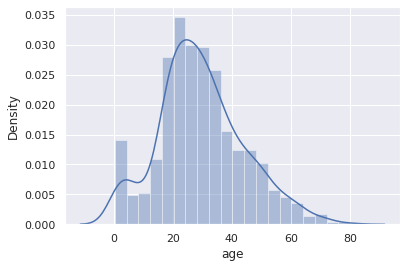

In [19]:
sns.distplot(titanic.age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


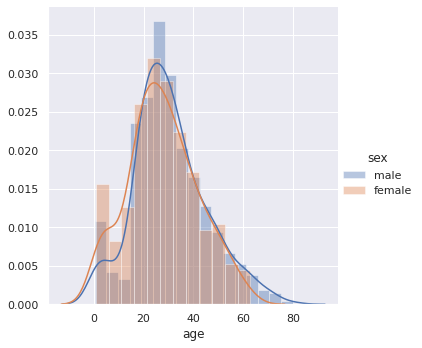

In [20]:
g = sns.FacetGrid(titanic, hue='sex', height=5)
g.map(sns.distplot, 'age')
g.add_legend()

### 棒グラフ

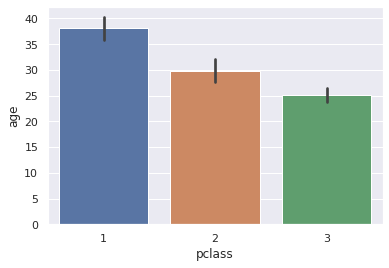

In [21]:
sns.barplot(data=titanic, x='pclass', y='age')

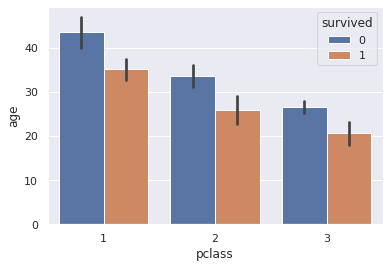

In [22]:
sns.barplot(data=titanic, x='pclass',y='age', hue='survived')

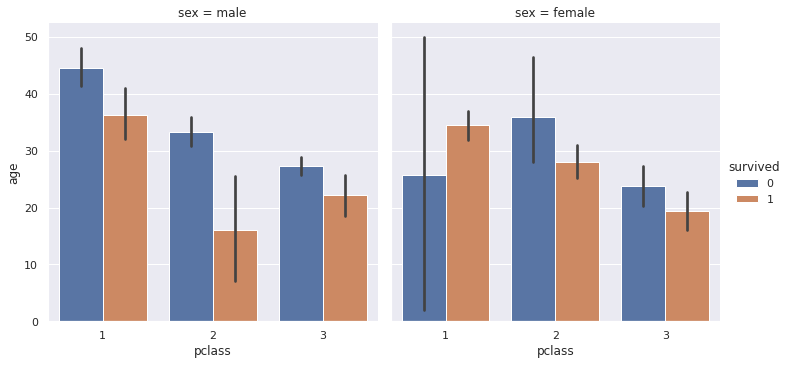

In [23]:
sns.catplot(data=titanic, kind='bar', x='pclass', y='age', hue='survived',col='sex')

### 箱ひげ図

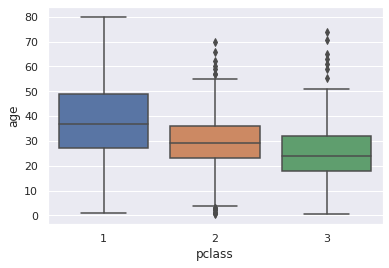

In [24]:
# 客室ランクごとの年齢の箱ひげ図
sns.boxplot(data=titanic, x='pclass', y='age')

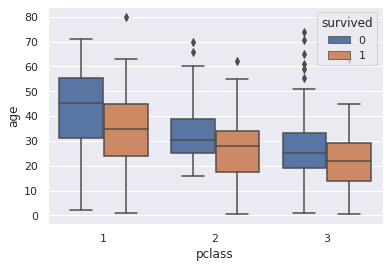

In [25]:
# 客室ランクを生死でスライシングして，層別に分析することもできる
sns.boxplot(data=titanic, x='pclass', y='age', hue='survived')

### 散布図

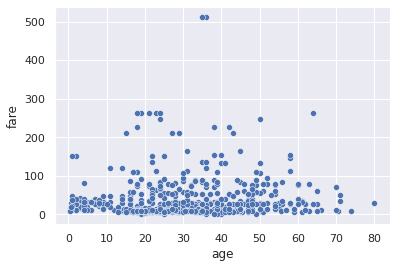

In [26]:
sns.scatterplot(data=titanic, x='age', y='fare')

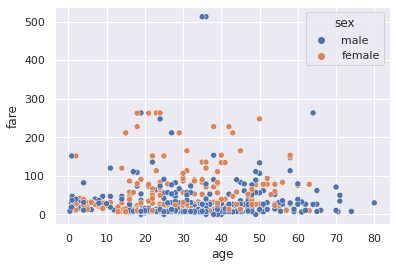

In [27]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

### ヒートマップ

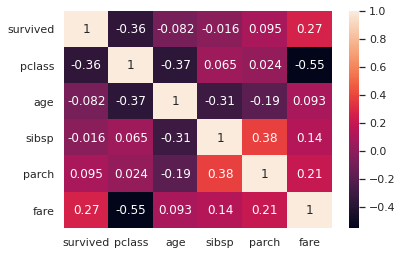

In [28]:
sns.heatmap(titanic.corr(),annot=True)

In [29]:
# 相関係数を個別に取り出す方法
titanic.corr()['pclass']['survived']

-0.35646158844523573

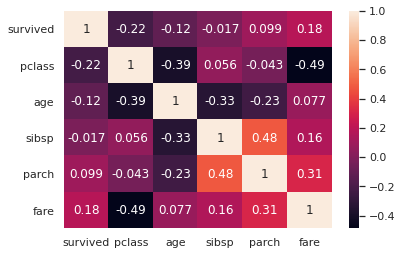

In [31]:
#　男女別にヒートマップを作ることもできる
sns.heatmap(titanic[titanic.sex=='male'].corr(), annot=True) # 男性